# Heart-Well Data Analysis Report


## Introduction

Heart-Well as a company has decided to integrate medical expertise and cutting-edge technology to contribute towards prevention of sudden cardiac arrests.We,As Data Scientists have been tasked to identify and predict patients who potentially could be subject to sudden cardiac arrest.
This report showcases our proficiency in importing libraries, manipulating data frames, and employing advanced analytical techniques, all tailored to the unique challenges posed by cardiac health. Through meticulous data exploration and innovative feature engineering, we have uncovered key predictors influencing sudden cardiac arrests risk, empowering us to develop robust prediction models.
This report is a deeper exploration of our data-driven journey and the transformative impact it may yield on patient outcomes.

### The following Python packages and libraries are required in order to run the code in this project:

In [5]:
# Import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bs4
import sklearn
from scipy.stats import zscore
import warnings
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config
set_config(display='diagram')
warnings.filterwarnings("ignore")

In [7]:
# Load the data into a DataFrame
heartwell_df = pd.read_csv("/Users/trishla/Downloads/SuddenCardiacArrest.csv")
heartwell_df.head()

,PatientName,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA
0,Patient 1,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0
1,Patient 2,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1
2,Patient 3,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0
3,Patient 4,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1
4,Patient 5,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0


### Removed identifiable features to preserve privacy.

## Exploratory Data Analysis

### Removed identifiable features

In [8]:
heartwell_df = heartwell_df.drop(columns="PatientName")
heartwell_df.head()

,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA
0,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0
1,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1
2,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0
3,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1
4,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0


### Data Dimensions

In [9]:
heartwell_df.shape

(1221, 12)

### Data Types

In [10]:
heartwell_df.dtypes

Age                        int64
Sex                       object
ECG-Resting               object
ST-Slope                  object
BloodPressure-Resting      int64
HeartRate-Max              int64
ChestPainType             object
Cholesterol                int64
BloodSugar-Fasting        object
ExerciseAngina            object
OldPeak                  float64
SCA                        int64
dtype: object

### Summary Statistics

In [11]:
heartwell_df.describe()

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,53.741196,132.221130,139.985258,210.684685,0.925143,0.529894
std,9.341351,18.286927,25.443021,100.425185,1.092282,0.499310
min,28.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,120.000000,122.000000,188.000000,0.000000,0.000000
50%,54.000000,130.000000,141.000000,228.000000,0.600000,1.000000
75%,60.000000,140.000000,160.000000,269.000000,1.600000,1.000000
max,77.000000,200.000000,202.000000,603.000000,6.200000,1.000000


### Correlation plot

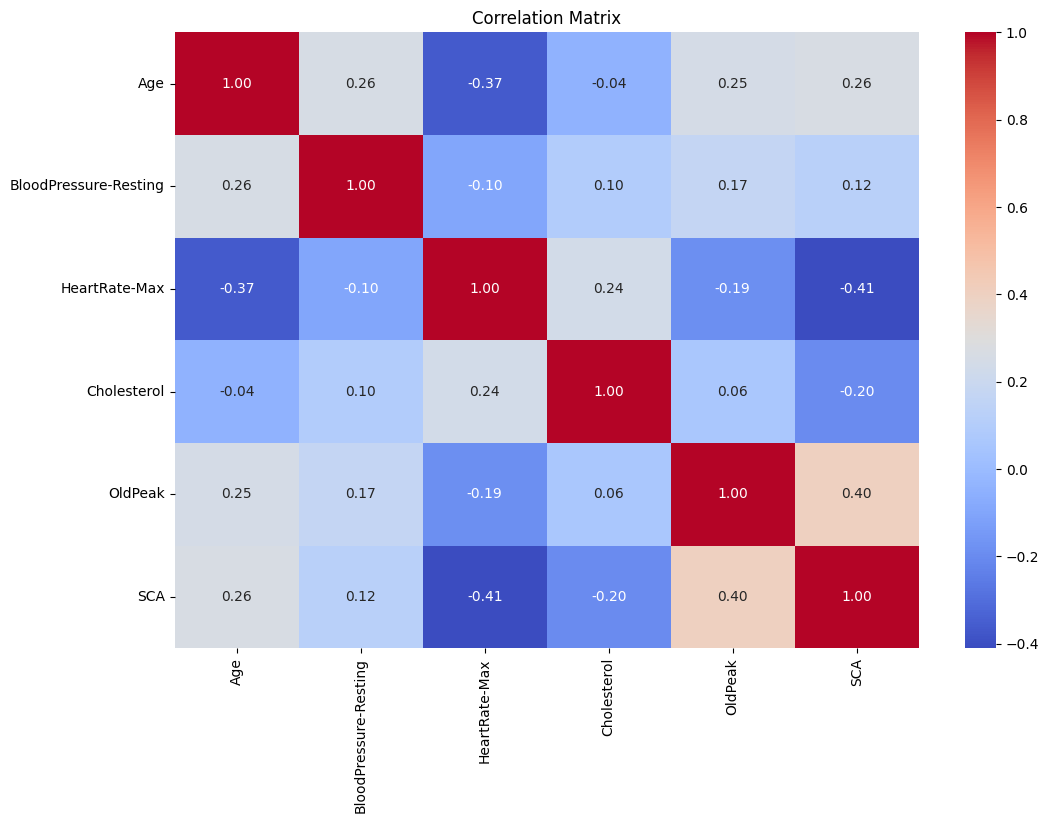

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(heartwell_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Data Distribution (Feature vs Target Variable)

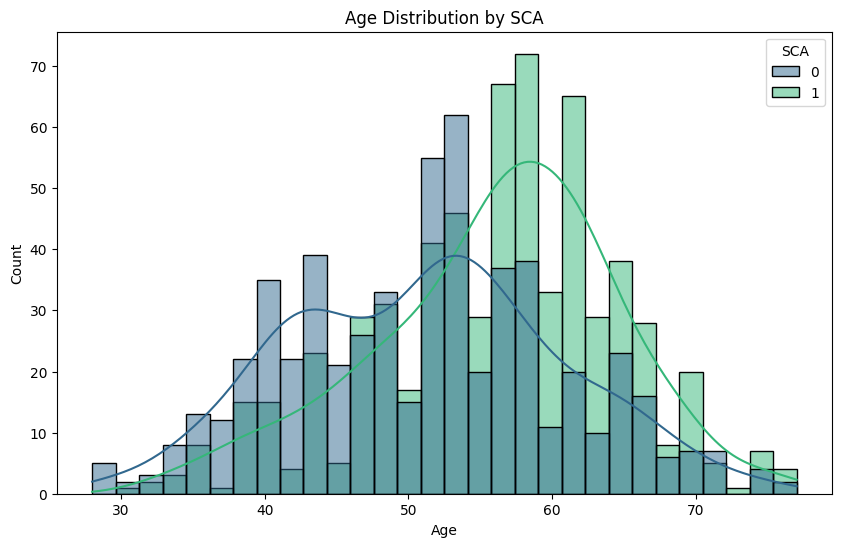

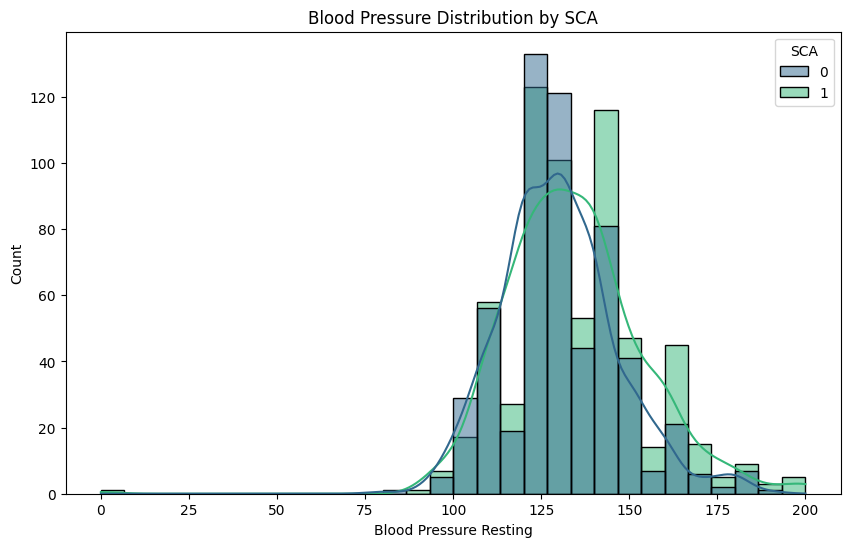

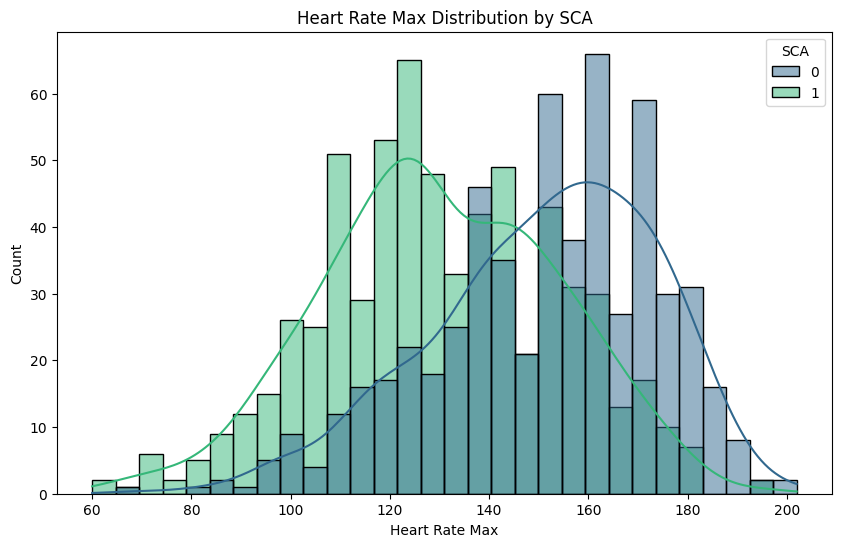

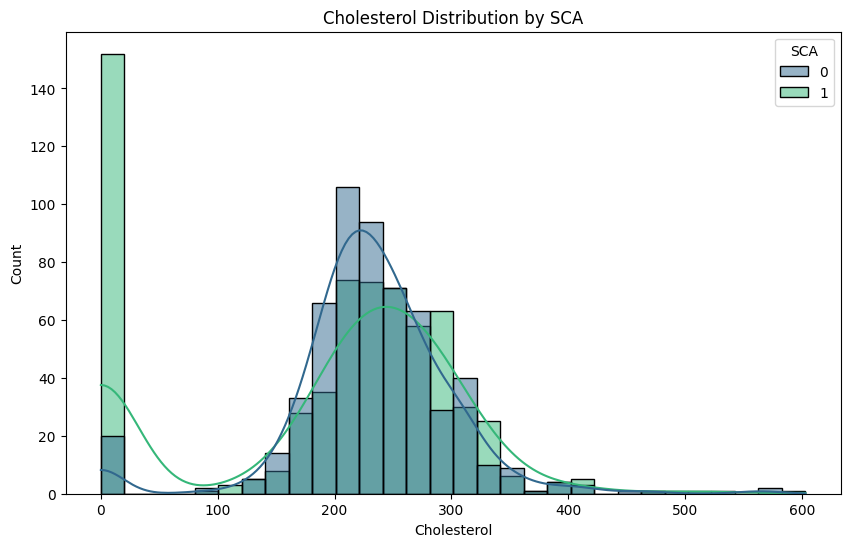

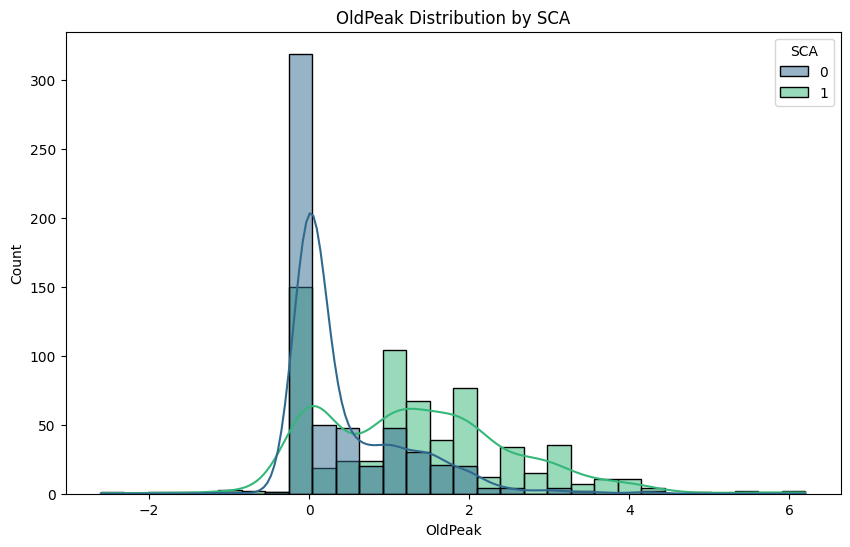

In [13]:
# Age vs SCA
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='SCA', data=heartwell_df, bins=30, kde=True, palette='viridis')
plt.title('Age Distribution by SCA')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Blood Pressure vs SCA
plt.figure(figsize=(10, 6))
sns.histplot(x='BloodPressure-Resting', hue='SCA', data=heartwell_df, bins=30, kde=True, palette='viridis')
plt.title('Blood Pressure Distribution by SCA')
plt.xlabel('Blood Pressure Resting')
plt.ylabel('Count')
plt.show()

# Heart Rate Max vs SCA
plt.figure(figsize=(10, 6))
sns.histplot(x='HeartRate-Max', hue='SCA', data=heartwell_df, bins=30, kde=True, palette='viridis')
plt.title('Heart Rate Max Distribution by SCA')
plt.xlabel('Heart Rate Max')
plt.ylabel('Count')
plt.show()

# Cholesterol vs SCA
plt.figure(figsize=(10, 6))
sns.histplot(x='Cholesterol', hue='SCA', data=heartwell_df, bins=30, kde=True, palette='viridis')
plt.title('Cholesterol Distribution by SCA')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

# OldPeak vs SCA
plt.figure(figsize=(10, 6))
sns.histplot(x='OldPeak', hue='SCA', data=heartwell_df, bins=30, kde=True, palette='viridis')
plt.title('OldPeak Distribution by SCA')
plt.xlabel('OldPeak')
plt.ylabel('Count')
plt.show()

## Data Pre-Processing and Wrangling

### Missing Values

In [14]:
heartwell_df.isnull().sum()

Age                      0
Sex                      0
ECG-Resting              0
ST-Slope                 0
BloodPressure-Resting    0
HeartRate-Max            0
ChestPainType            0
Cholesterol              0
BloodSugar-Fasting       0
ExerciseAngina           0
OldPeak                  0
SCA                      0
dtype: int64

### Missing values imputation

In [15]:
print("No imputation of missing values required since there are no missing values in data to affect our models")

No imputation of missing values required since there are no missing values in data to affect our models


### Duplicate Data

In [16]:
duplicate_rows = heartwell_df.duplicated().sum()
#duplicate_rows
print(f"The number of duplicated rows in our data is {duplicate_rows}")

The number of duplicated rows in our data is 303


In [17]:
heartwell_df = heartwell_df.drop_duplicates()

In [18]:
duplicate_rows = heartwell_df.duplicated().sum()
duplicate_rows

0

In [19]:
print("We have removed the duplicated records")

We have removed the duplicated records


### Feature Engineering

#### Added AgeGroup category column based on age range. 

In [20]:
# Define age ranges and corresponding labels
bins = [19,39,59,79,99]
labels = ['19-39','40-59','60-79','80-99']

# Create the 'AgeGroup' column
heartwell_df['AgeGroup'] = pd.cut(heartwell_df['Age'], bins=bins, labels=labels, right=False)
heartwell_df.head(5)

,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA,AgeGroup
0,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0,40-59
1,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1,40-59
2,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0,19-39
3,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1,40-59
4,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0,40-59


### Calculate the risk based on Age, Blood Pressure-Resting, Cholesterol, and Max Heart Rate

In [21]:
# The formula for risk calculation can be adjusted based on specific requirements or medical insights.

heartwell_df["risk"]= heartwell_df["Age"]/(heartwell_df["BloodPressure-Resting"]+heartwell_df["Cholesterol"]+heartwell_df["HeartRate-Max"])
heartwell_df.head(5)

,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA,AgeGroup,risk
0,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0,40-59,0.066556
1,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1,40-59,0.098790
2,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0,19-39,0.072407
3,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1,40-59,0.104348
4,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0,40-59,0.115632


### Outliers

In [22]:
# Calculated Z-scores for numerical features
z_scores = zscore(heartwell_df.select_dtypes(include=np.number))
z_scores

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA,risk
0,-1.433140,0.410909,1.382928,0.825070,-0.832432,-1.113115,-1.081028
1,-0.478484,1.491752,0.754157,-0.171961,0.105664,0.898380,-0.503071
2,-1.751359,-0.129513,-1.525138,0.770188,-0.832432,-1.113115,-0.976116
3,-0.584556,0.302825,-1.132156,0.139040,0.574711,0.898380,-0.403427
4,0.051881,0.951331,-0.581981,-0.034755,-0.832432,-1.113115,-0.201110
...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,-0.188999,0.596393,0.293283,0.898380,-0.679814
914,1.536902,0.627078,0.164684,-0.053049,2.357094,0.898380,0.276317
915,0.370100,-0.129513,-0.857069,-0.620168,0.293283,0.898380,0.443715
916,0.370100,-0.129513,1.461525,0.340275,-0.832432,0.898380,-0.381773


In [23]:
# Set a threshold for Z score to catch the outliers
threshold = 3
outliers = np.abs(z_scores) > threshold
outliers

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA,risk
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False


In [24]:
# Removed outliers
df_no_outliers = heartwell_df[~outliers.any(axis=1)]
df_no_outliers

,Age,Sex,ECG-Resting,ST-Slope,BloodPressure-Resting,HeartRate-Max,ChestPainType,Cholesterol,BloodSugar-Fasting,ExerciseAngina,OldPeak,SCA,AgeGroup,risk
0,40,M,Normal,Up,140,172,ATA,289,Normal,N,0.0,0,40-59,0.066556
1,49,F,Normal,Flat,160,156,NAP,180,Normal,N,1.0,1,40-59,0.098790
2,37,M,ST,Up,130,98,ATA,283,Normal,N,0.0,0,19-39,0.072407
3,48,F,Normal,Flat,138,108,ASY,214,Normal,Y,1.5,1,40-59,0.104348
4,54,M,Normal,Up,150,122,NAP,195,Normal,N,0.0,0,40-59,0.115632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,Normal,Flat,110,132,TA,264,Normal,N,1.2,1,40-59,0.088933
914,68,M,Normal,Flat,144,141,ASY,193,High,N,3.4,1,60-79,0.142259
915,57,M,Normal,Flat,130,115,ASY,131,Normal,Y,1.2,1,40-59,0.151596
916,57,F,LVH,Flat,130,174,ATA,236,Normal,N,0.0,1,40-59,0.105556


### Categorical Data Encoding

In [25]:
# Categorical Data Encoding:One-Hot Encoding on multiple columns to converts categorical variables into binary columns for each category to create machine learning models
df_encoded = pd.get_dummies(df_no_outliers, columns=['Sex','ECG-Resting','ST-Slope','ChestPainType','BloodSugar-Fasting', 'ExerciseAngina','AgeGroup'])
df_encoded.head()

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA,risk,Sex_F,Sex_M,ECG-Resting_LVH,...,ChestPainType_NAP,ChestPainType_TA,BloodSugar-Fasting_High,BloodSugar-Fasting_Normal,ExerciseAngina_N,ExerciseAngina_Y,AgeGroup_19-39,AgeGroup_40-59,AgeGroup_60-79,AgeGroup_80-99
0,40,140,172,289,0.0,0,0.066556,False,True,False,...,False,False,False,True,True,False,False,True,False,False
1,49,160,156,180,1.0,1,0.098790,True,False,False,...,True,False,False,True,True,False,False,True,False,False
2,37,130,98,283,0.0,0,0.072407,False,True,False,...,False,False,False,True,True,False,True,False,False,False
3,48,138,108,214,1.5,1,0.104348,True,False,False,...,False,False,False,True,False,True,False,True,False,False
4,54,150,122,195,0.0,0,0.115632,False,True,False,...,True,False,False,True,True,False,False,True,False,False


### Feature Scaling

In [26]:
# Feature Scaling: Standard Scaling (Z-score normalization),Standard scaling is used to transform the data, ensuring that it has a mean of 0 and a standard deviation of 1.

# Initialize the StandardScaler
scaler = StandardScaler()

## Fit and transform the selected features
df_encoded[['Age', 'BloodPressure-Resting', 'Cholesterol', 'OldPeak']] = scaler.fit_transform(
    df_encoded[['Age', 'BloodPressure-Resting', 'Cholesterol', 'OldPeak']])

df_encoded

,Age,BloodPressure-Resting,HeartRate-Max,Cholesterol,OldPeak,SCA,risk,Sex_F,Sex_M,ECG-Resting_LVH,...,ChestPainType_NAP,ChestPainType_TA,BloodSugar-Fasting_High,BloodSugar-Fasting_Normal,ExerciseAngina_N,ExerciseAngina_Y,AgeGroup_19-39,AgeGroup_40-59,AgeGroup_60-79,AgeGroup_80-99
0,-1.420081,0.460473,172,0.842348,-0.861509,0,0.066556,False,True,False,...,False,False,False,True,True,False,False,True,False,False
1,-0.466902,1.629032,156,-0.186787,0.132540,1,0.098790,True,False,False,...,True,False,False,True,True,False,False,True,False,False
2,-1.737808,-0.123807,98,0.785698,-0.861509,0,0.072407,False,True,False,...,False,False,False,True,True,False,True,False,False,False
3,-0.572811,0.343617,108,0.134228,0.629564,1,0.104348,True,False,False,...,False,False,False,True,False,True,False,True,False,False
4,0.062642,1.044752,122,-0.045163,-0.861509,0,0.115632,False,True,False,...,True,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.890537,-1.292366,132,0.606308,0.331350,1,0.088933,False,True,False,...,False,True,False,True,True,False,False,True,False,False
914,1.545365,0.694185,141,-0.064046,2.518258,1,0.142259,False,True,False,...,False,False,True,False,True,False,False,False,True,False
915,0.380368,-0.123807,115,-0.649425,0.331350,1,0.151596,False,True,False,...,False,False,False,True,False,True,False,True,False,False
916,0.380368,-0.123807,174,0.341943,-0.861509,1,0.105556,True,False,True,...,False,False,False,True,True,False,False,True,False,False


### Build Functions.

In [27]:
# Function for evaluating the model
def evaluate_model(model, X_test, y_test, average='weighted'):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=average)
    recall = recall_score(y_test, y_pred, average=average)
    f1 = f1_score(y_test, y_pred, average=average)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'Accuracy: {acc:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f"{type(model).__name__} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.show()

## Models Building

### Decision Tree

In [28]:
X = df_encoded.drop("SCA", axis=1)
y = df_encoded["SCA"]

In [29]:
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Decision Tree model

In [31]:
#Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

#Train the Decision Tree model on the training data
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(random_state=42)

### Random Forest

In [32]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Support Vector Machine

In [33]:
# Initialize the SVM classifier
svm_model = SVC(random_state=42)

# Train the Support Vector Machine model on the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

### K Nearest Neighbors

In [34]:
#Initialize the KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### Gradient Boosting

In [35]:
# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

## Models Evaluation and Comparisions

### Decision Tree Evaluation

Accuracy: 0.79
Precision: 0.79
Recall: 0.79
F1-score: 0.79
DecisionTreeClassifier Cross-Validation Accuracy: 0.75


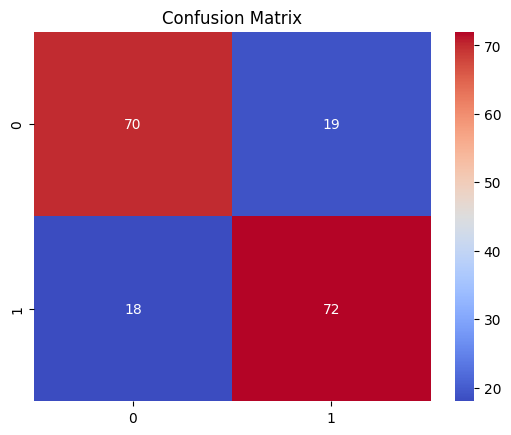

In [36]:
# Make predictions on the test data
evaluate_model(dt_model, X_test, y_test, average='weighted')

### Random Forest Evaluation

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90
RandomForestClassifier Cross-Validation Accuracy: 0.82


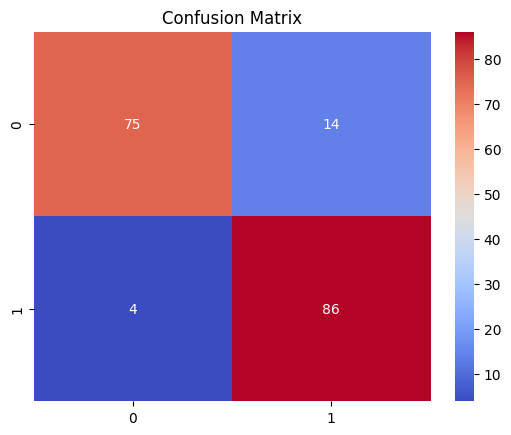

In [37]:
# Make predictions on the test data
evaluate_model(rf_model, X_test, y_test)

### Support Vector Machine Evaluation

Accuracy: 0.68
Precision: 0.70
Recall: 0.68
F1-score: 0.67
SVC Cross-Validation Accuracy: 0.68


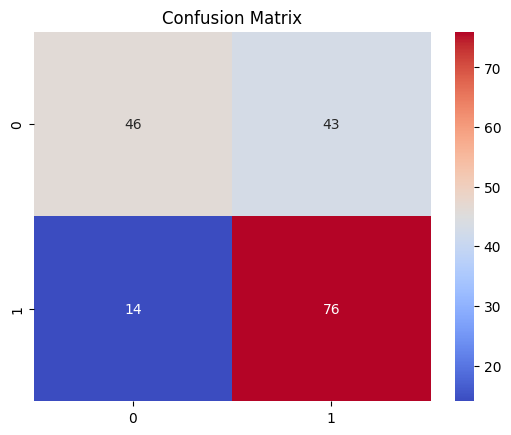

In [38]:
# Make predictions on the test data
evaluate_model(svm_model, X_test, y_test)

### K-Nearest Neighbors Evaluation

Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1-score: 0.80
KNeighborsClassifier Cross-Validation Accuracy: nan


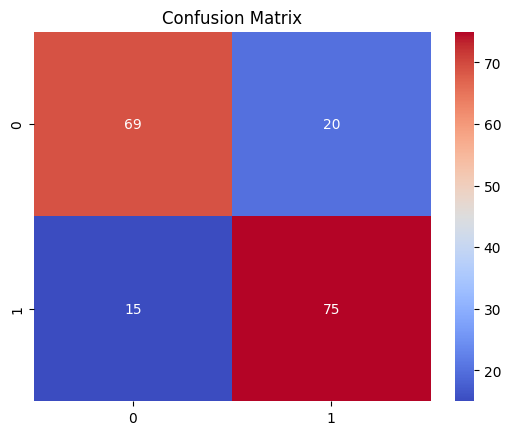

In [39]:
# Make predictions on the test data
evaluate_model(knn_model, X_test, y_test)

### Gradient Boosting Evaluation

Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-score: 0.84
GradientBoostingClassifier Cross-Validation Accuracy: 0.81


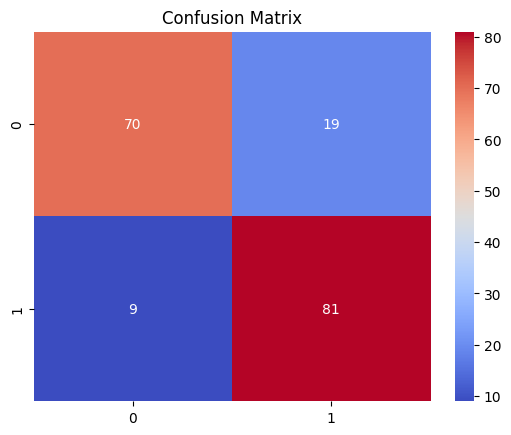

In [40]:
# Make predictions on the test data
evaluate_model(gb_model, X_test, y_test)